In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_excel ("online_retail.xlsx",sheet_name = "Year 2009-2010") 


In [3]:
df2 = pd.read_excel("online_retail.xlsx",sheet_name = "Year 2010-2011") 

In [4]:
df= pd.concat([df1,df2],ignore_index=True)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [6]:
df['Customer ID'].nunique()

5942

In [7]:
df.nunique(axis=0)

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

In [8]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [10]:
pd.DataFrame(df.isna().sum()/len(df)).T

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0.0,0.0,0.004105,0.0,0.0,0.0,0.227669,0.0


In [11]:
>>>Problem 1: Datatype 'Customer ID', Missing value 'description', 'customer ID'

SyntaxError: invalid syntax (Temp/ipykernel_11864/1409413578.py, line 1)

<AxesSubplot:>

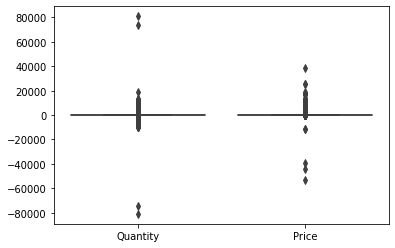

In [12]:
sns.boxplot(data=df[['Quantity','Price']])

In [ ]:
>>>Problem 2: Outliers 'Quantity' as Quantity < 0, 'Price'

In [13]:
df.duplicated().sum()

34335

In [ ]:
>>>Problem 3: duplicated value

Data Cleaning and Processing

In [ ]:
>>>Remove outlier 'Quantity'

In [14]:
q1 = df['Quantity'].quantile(0.25)
q3 = df['Quantity'].quantile(0.75)
IQL = q3-q1
upper_limit = q3+1.5*IQL
lower_limit = q1-1.5*IQL

In [15]:
lower_limit

-12.5

In [16]:
df['Quantity_RO']=pd.DataFrame(np.where(df['Quantity']  > upper_limit, upper_limit,
                            np.where(df['Quantity'] < lower_limit, lower_limit,df['Quantity'])))

In [17]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_RO
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,23.5
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,23.5


<AxesSubplot:>

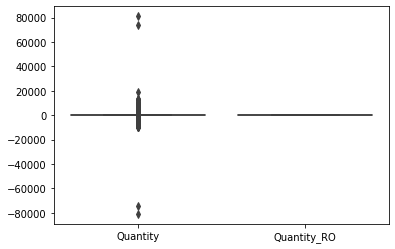

In [18]:
sns.boxplot(data=df[['Quantity','Quantity_RO']])

<AxesSubplot:>

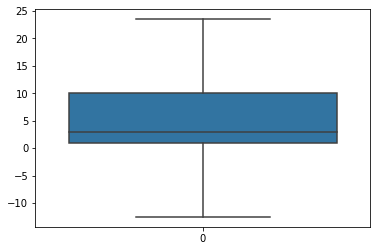

In [19]:
sns.boxplot(data=df['Quantity_RO'])

In [20]:
q1_p = df['Price'].quantile(0.25)
q3_p = df['Price'].quantile(0.75)
IQL_p = q3_p - q1_p
upper_limit_p = q3_p + 1.5*IQL_p
lower_limit_p = q1_p - 1.5*IQL_p

In [21]:
df['Price_RO']=pd.DataFrame(np.where(df['Price']  > upper_limit_p, upper_limit_p,
                            np.where(df['Price'] < lower_limit_p, lower_limit_p,df['Price'])))

In [22]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_RO,Price_RO
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12.0,6.95
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,23.5,2.10
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,23.5,1.25


<AxesSubplot:>

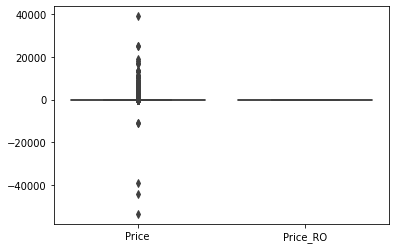

In [23]:
sns.boxplot(data=df[['Price','Price_RO']])

<AxesSubplot:>

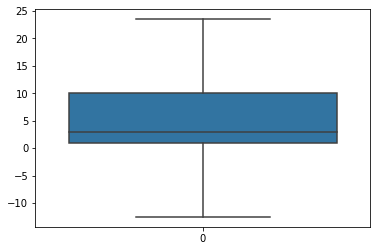

In [24]:
sns.boxplot(data=df['Quantity_RO'])

In [ ]:
>>> Missing value,negative, duplicates

In [25]:
df.describe()

,Quantity,Price,Customer ID,Quantity_RO,Price_RO
count,1.067371e+06,1.067371e+06,824364.000000,1.067371e+06,1.067371e+06
mean,9.938898e+00,4.649388e+00,15324.638504,6.450242e+00,3.007218e+00
std,1.727058e+02,1.235531e+02,1697.464450,7.313627e+00,2.429471e+00
min,-8.099500e+04,-5.359436e+04,12346.000000,-1.250000e+01,-3.100000e+00
25%,1.000000e+00,1.250000e+00,13975.000000,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00,15255.000000,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00,16797.000000,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04,18287.000000,2.350000e+01,8.500000e+00


<AxesSubplot:>

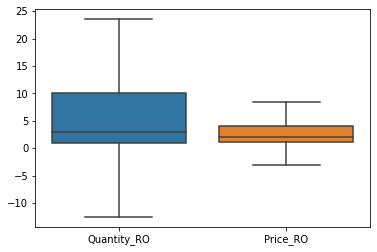

In [26]:
sns.boxplot(data=df[['Quantity_RO','Price_RO']])

In [27]:
df = df.dropna(axis=0, subset=['Customer ID'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
 8   Quantity_RO  824364 non-null  float64       
 9   Price_RO     824364 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 69.2+ MB


In [29]:
df.describe()

,Quantity,Price,Customer ID,Quantity_RO,Price_RO
count,824364.000000,824364.000000,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504,7.636836,2.749455
std,188.976099,70.241388,1697.464450,7.622244,2.306330
min,-80995.000000,0.000000,12346.000000,-12.500000,0.000000
25%,2.000000,1.250000,13975.000000,2.000000,1.250000
50%,5.000000,1.950000,15255.000000,5.000000,1.950000
75%,12.000000,3.750000,16797.000000,12.000000,3.750000
max,80995.000000,38970.000000,18287.000000,23.500000,8.500000


In [30]:
df = df[~df['StockCode'].isin(['TEST','M'])]

In [31]:
df = df.drop_duplicates(keep='first').reset_index(drop=True)

In [32]:
df.columns = df.columns.str.replace(' ','_')

In [33]:
df.Customer_ID = df.Customer_ID.astype('int64')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796800 entries, 0 to 796799
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      796800 non-null  object        
 1   StockCode    796800 non-null  object        
 2   Description  796800 non-null  object        
 3   Quantity     796800 non-null  int64         
 4   InvoiceDate  796800 non-null  datetime64[ns]
 5   Price        796800 non-null  float64       
 6   Customer_ID  796800 non-null  int64         
 7   Country      796800 non-null  object        
 8   Quantity_RO  796800 non-null  float64       
 9   Price_RO     796800 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 60.8+ MB


In [35]:
df[df['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Quantity_RO,Price_RO


In [36]:
df[df['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Quantity_RO,Price_RO
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia,-12.0,2.95
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia,-6.0,1.65
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia,-4.0,4.25
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia,-6.0,2.10
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia,-12.0,2.95
...,...,...,...,...,...,...,...,...,...,...
796354,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397,United Kingdom,-12.0,1.95
796355,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-11.0,0.83
796605,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-5.0,8.50
796606,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.0,1.25


In [37]:
df = df.drop(df[df.Quantity < 0].index)

In [38]:
df.describe()

,Quantity,Price,Customer_ID,Quantity_RO,Price_RO
count,778807.000000,778807.000000,778807.000000,778807.000000,778807.000000
mean,13.506959,3.033230,15320.186808,8.011227,2.725074
std,146.580138,11.279049,1695.659254,7.481025,2.290553
min,1.000000,0.000000,12346.000000,1.000000,0.000000
25%,2.000000,1.250000,13971.000000,2.000000,1.250000
50%,6.000000,1.950000,15246.000000,6.000000,1.950000
75%,12.000000,3.750000,16794.000000,12.000000,3.750000
max,80995.000000,8142.750000,18287.000000,23.500000,8.500000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778807 entries, 0 to 796799
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      778807 non-null  object        
 1   StockCode    778807 non-null  object        
 2   Description  778807 non-null  object        
 3   Quantity     778807 non-null  int64         
 4   InvoiceDate  778807 non-null  datetime64[ns]
 5   Price        778807 non-null  float64       
 6   Customer_ID  778807 non-null  int64         
 7   Country      778807 non-null  object        
 8   Quantity_RO  778807 non-null  float64       
 9   Price_RO     778807 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 65.4+ MB


Feature Creation

In [46]:
df.head()


,Invoice,StockCode,Description,InvoiceDate,Customer_ID,Country,Quantity_RO,Price_RO
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2009-12-01 07:45:00,13085,United Kingdom,12.0,6.95
1,489434,79323P,PINK CHERRY LIGHTS,2009-12-01 07:45:00,13085,United Kingdom,12.0,6.75
2,489434,79323W,WHITE CHERRY LIGHTS,2009-12-01 07:45:00,13085,United Kingdom,12.0,6.75
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",2009-12-01 07:45:00,13085,United Kingdom,23.5,2.10
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,2009-12-01 07:45:00,13085,United Kingdom,23.5,1.25


In [47]:
df['StockValue'] = df['Quantity_RO']*df['Price_RO']

In [49]:
df

,Invoice,StockCode,Description,InvoiceDate,Customer_ID,Country,Quantity_RO,Price_RO,StockValue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2009-12-01 07:45:00,13085,United Kingdom,12.0,6.95,83.400
1,489434,79323P,PINK CHERRY LIGHTS,2009-12-01 07:45:00,13085,United Kingdom,12.0,6.75,81.000
2,489434,79323W,WHITE CHERRY LIGHTS,2009-12-01 07:45:00,13085,United Kingdom,12.0,6.75,81.000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",2009-12-01 07:45:00,13085,United Kingdom,23.5,2.10,49.350
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,2009-12-01 07:45:00,13085,United Kingdom,23.5,1.25,29.375
...,...,...,...,...,...,...,...,...,...
796795,581587,22899,CHILDREN'S APRON DOLLY GIRL,2011-12-09 12:50:00,12680,France,6.0,2.10,12.600
796796,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,2011-12-09 12:50:00,12680,France,4.0,4.15,16.600
796797,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,2011-12-09 12:50:00,12680,France,4.0,4.15,16.600
796798,581587,22138,BAKING SET 9 PIECE RETROSPOT,2011-12-09 12:50:00,12680,France,3.0,4.95,14.850


In [51]:
m = df.groupby('Customer_ID')['StockValue'].sum()
m = pd.DataFrame(m).reset_index()

In [52]:
m

,Customer_ID,StockValue
0,12346,397.300
1,12347,4445.300
2,12348,732.850
3,12349,3393.565
4,12350,302.475
...,...,...
5861,18283,2638.550
5862,18284,363.440
5863,18285,228.525
5864,18286,1169.345


In [53]:
freq = df.groupby('Customer_ID')['InvoiceDate'].count()
f = pd.DataFrame(freq).reset_index()

In [54]:
f

,Customer_ID,InvoiceDate
0,12346,34
1,12347,222
2,12348,51
3,12349,175
4,12350,17
...,...,...
5861,18283,936
5862,18284,28
5863,18285,12
5864,18286,67


In [55]:
df['InvoiceDate'].min(),df['InvoiceDate'].max()

(Timestamp('2009-12-01 07:45:00'), Timestamp('2011-12-09 12:50:00'))

In [57]:
import datetime as dt

In [59]:
PRESENT = dt.datetime(2011,12,10)
PRESENT

datetime.datetime(2011, 12, 10, 0, 0)

In [62]:
r = df.groupby('Customer_ID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days})

In [63]:
r

,InvoiceDate
Customer_ID,
12346,325
12347,2
12348,75
12349,18
12350,310
...,...
18283,3
18284,431
18285,660


In [64]:
rmf = r.merge(m,on='Customer_ID').merge(f,on='Customer_ID')

In [65]:
rmf

,Customer_ID,InvoiceDate_x,StockValue,InvoiceDate_y
0,12346,325,397.300,34
1,12347,2,4445.300,222
2,12348,75,732.850,51
3,12349,18,3393.565,175
4,12350,310,302.475,17
...,...,...,...,...
5861,18283,3,2638.550,936
5862,18284,431,363.440,28
5863,18285,660,228.525,12
5864,18286,476,1169.345,67


In [67]:
rmf.columns

Index(['Customer_ID', 'InvoiceDate_x', 'StockValue', 'InvoiceDate_y'], dtype='object')

In [70]:
rmf = rmf.rename({'InvoiceDate_x': 'Rencency', 'StockValue': 'Monetary', 'InvoiceDate_y':'Frequency'}, axis=1)

In [71]:
rmf

,Customer_ID,Rencency,Monetary,Frequency
0,12346,325,397.300,34
1,12347,2,4445.300,222
2,12348,75,732.850,51
3,12349,18,3393.565,175
4,12350,310,302.475,17
...,...,...,...,...
5861,18283,3,2638.550,936
5862,18284,431,363.440,28
5863,18285,660,228.525,12
5864,18286,476,1169.345,67


In [72]:
from sklearn.cluster import KMeans

<AxesSubplot:>

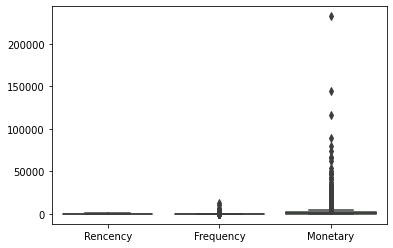

In [79]:
sns.boxplot(data=rmf[['Rencency','Frequency','Monetary']])

In [81]:
from sklearn.preprocessing import StandardScaler

<AxesSubplot:title={'center':'Frequency distribution'}, xlabel='Frequency', ylabel='Density'>

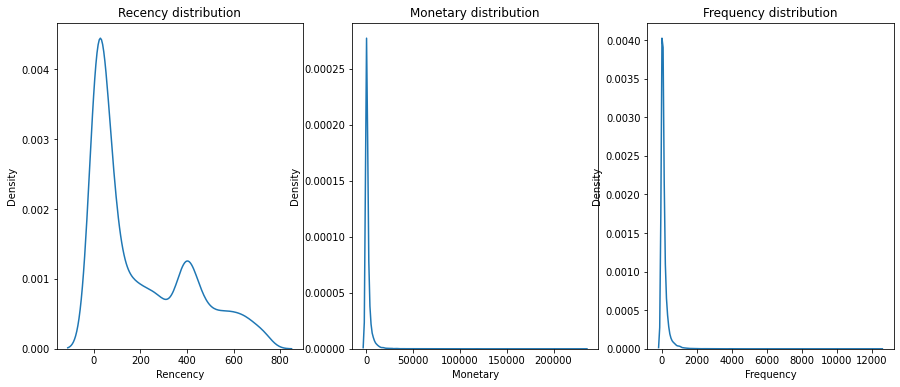

In [88]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.title('Recency distribution')
sns.kdeplot(data=rmf['Rencency'])

plt.subplot(1,3,2)
plt.title('Monetary distribution')
sns.kdeplot(data=rmf['Monetary'])

plt.subplot(1,3,3)
plt.title('Frequency distribution')
sns.kdeplot(data=rmf['Frequency'])

In [90]:
scaler = StandardScaler()
rmf_normalized = rmf[['Rencency','Monetary','Frequency']]
rmf_normalized

,Rencency,Monetary,Frequency
0,325,397.300,34
1,2,4445.300,222
2,75,732.850,51
3,18,3393.565,175
4,310,302.475,17
...,...,...,...
5861,3,2638.550,936
5862,431,363.440,28
5863,660,228.525,12
5864,476,1169.345,67


In [91]:
rmf_normalized = scaler.fit_transform(rmf_normalized)
rmf_normalized = pd.DataFrame(rmf_normalized)
rmf_normalized

,0,1,2
0,0.594494,-0.281236,-0.288674
1,-0.948744,0.429654,0.260813
2,-0.599963,-0.222309,-0.238987
3,-0.872299,0.244953,0.123441
4,0.522827,-0.297889,-0.338362
...,...,...,...
5861,-0.943966,0.112361,2.347694
5862,1.100944,-0.287183,-0.306211
5863,2.195067,-0.310876,-0.352976
5864,1.315946,-0.145653,-0.192222


In [102]:
rmf_normalized = rmf_normalized.rename({0: 'Rencency', 1: 'Monetary', 2:'Frequency'}, axis=1)

In [104]:
rmf_normalized

,Rencency,Monetary,Frequency
0,0.594494,-0.281236,-0.288674
1,-0.948744,0.429654,0.260813
2,-0.599963,-0.222309,-0.238987
3,-0.872299,0.244953,0.123441
4,0.522827,-0.297889,-0.338362
...,...,...,...
5861,-0.943966,0.112361,2.347694
5862,1.100944,-0.287183,-0.306211
5863,2.195067,-0.310876,-0.352976
5864,1.315946,-0.145653,-0.192222


<AxesSubplot:title={'center':'Frequency distribution'}>

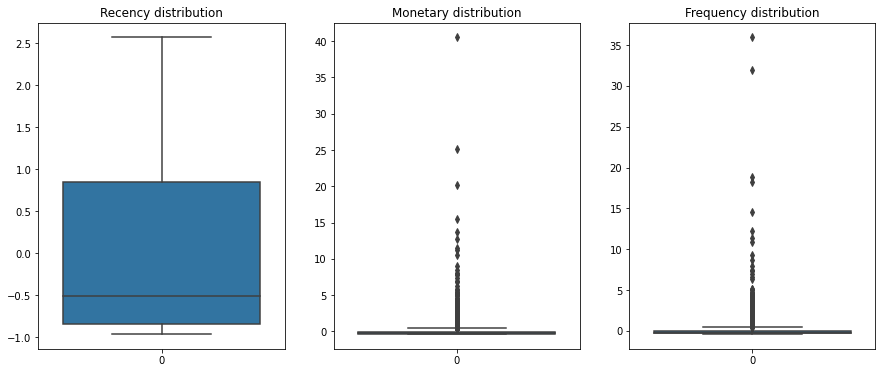

In [106]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.title('Recency distribution')
sns.boxplot(data=rmf_normalized['Rencency'])

plt.subplot(1,3,2)
plt.title('Monetary distribution')
sns.boxplot(data=rmf_normalized['Monetary'])

plt.subplot(1,3,3)
plt.title('Frequency distribution')
sns.boxplot(data=rmf_normalized['Frequency'])

In [107]:
from sklearn.cluster import KMeans

In [111]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rmf_normalized)

KMeans(max_iter=50, n_clusters=4)

In [112]:
d = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(rmf_normalized)
    d.append((k, km.inertia_))
d

[(1, 17275157683.591537),
 (2, 4325419565.402969),
 (3, 1923151547.503761),
 (4, 1081359563.6506157),
 (5, 690207598.8079896),
 (6, 480015232.5470784),
 (7, 351873513.0011131),
 (8, 270135267.96006846),
 (9, 212944678.45484954)]

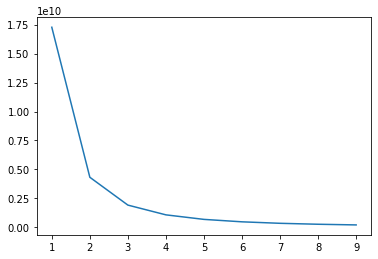

In [113]:
d = np.array(d)
plt.plot(d[:,0],d[:,1])
plt.show()

In [120]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rmf_normalized)

KMeans(max_iter=50, n_clusters=3)

In [121]:
rmf_normalized.loc[:,'Customer_ID']=rmf['Customer_ID']

In [122]:
rmf_normalized

,Rencency,Monetary,Frequency,Customer_ID,cluster
0,0.594494,-0.281236,-0.288674,12346,1
1,-0.948744,0.429654,0.260813,12347,1
2,-0.599963,-0.222309,-0.238987,12348,1
3,-0.872299,0.244953,0.123441,12349,1
4,0.522827,-0.297889,-0.338362,12350,1
...,...,...,...,...,...
5861,-0.943966,0.112361,2.347694,18283,0
5862,1.100944,-0.287183,-0.306211,18284,0
5863,2.195067,-0.310876,-0.352976,18285,0
5864,1.315946,-0.145653,-0.192222,18286,0


In [123]:
rmf_normalized['cluster']=kmeans.labels_
rmf_normalized.tail(100)

,Rencency,Monetary,Frequency,Customer_ID,cluster
5766,-0.886632,0.143921,0.000683,18188,2
5767,-0.590407,-0.106399,-0.136689,18189,2
5768,-0.040957,-0.225089,-0.265292,18190,2
5769,0.288713,-0.267165,-0.344208,18191,2
5770,-0.619074,-0.192911,-0.256524,18192,2
...,...,...,...,...,...
5861,-0.943966,0.112361,2.347694,18283,2
5862,1.100944,-0.287183,-0.306211,18284,2
5863,2.195067,-0.310876,-0.352976,18285,2
5864,1.315946,-0.145653,-0.192222,18286,2


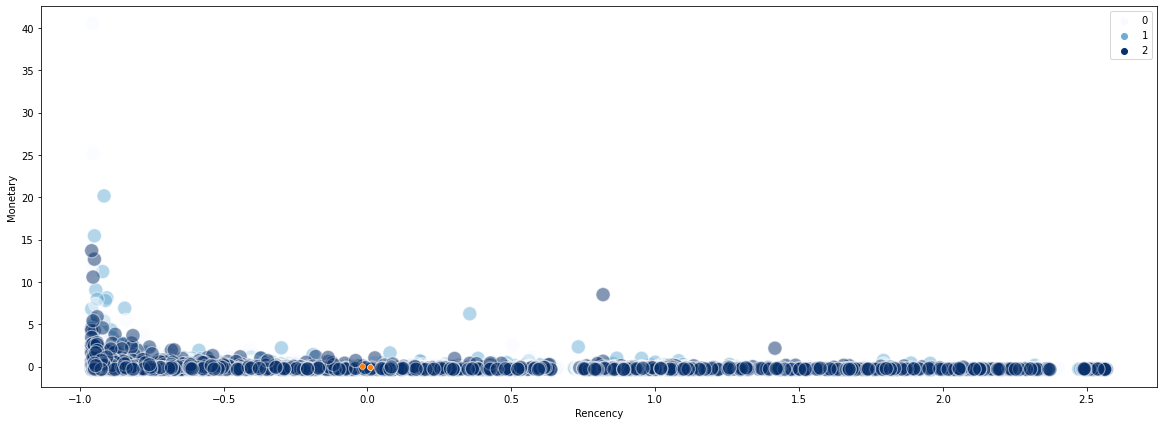

In [161]:
plt.figure(figsize=(20,7))
ax = sns.scatterplot(data=rmf_normalized,
                    x='Rencency',
                    y='Monetary',
                    palette='Blues',
                    hue='cluster',
                    s=200, alpha=0.5)
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1])
plt.show()

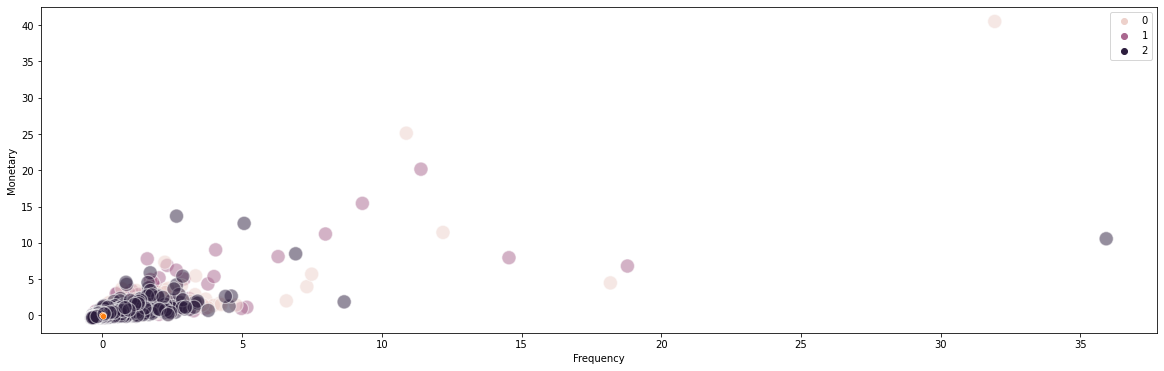

In [160]:
plt.figure(figsize=(20,6))
ax = sns.scatterplot(data=rmf_normalized,
                    x='Frequency',
                    y='Monetary',
                    hue='cluster',
                    s=200, alpha=0.5)
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1])
plt.show()

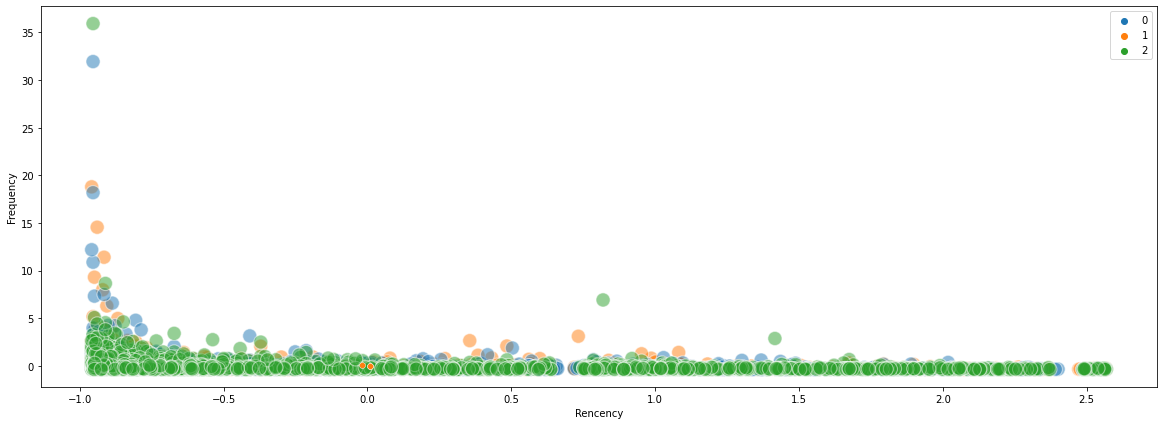

In [171]:
plt.figure(figsize=(20,7))
ax = sns.scatterplot(data=rmf_normalized,
                    x='Rencency',
                    y='Frequency',
                    palette = "tab10",
                    hue='cluster',
                    s=200, alpha=0.5)
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1])
plt.show()